In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread("/content/drive/MyDrive/learning/computer_vision/basic/image/dog.jpg")

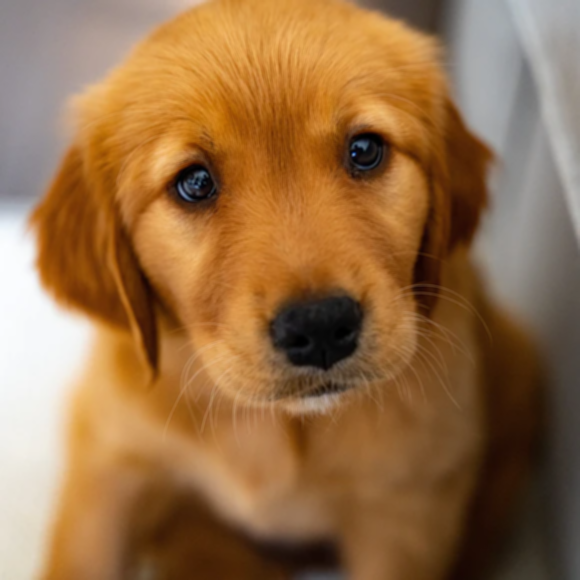

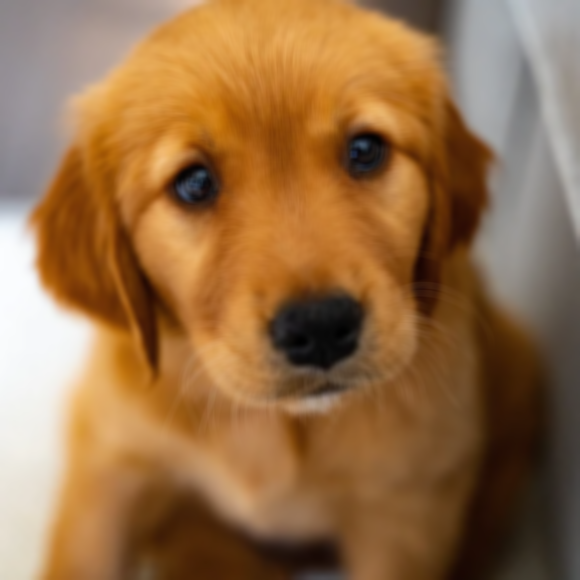

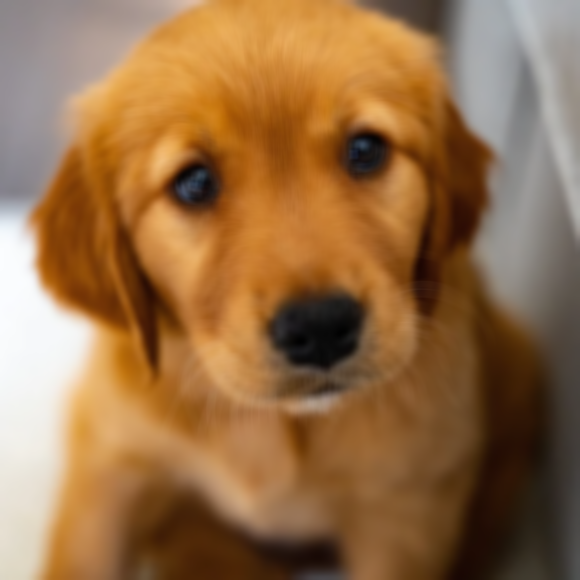

In [ ]:
## Blurring using Convolutions
##  Convolutions is a basically mathematics operations performed on two functions 

## Creating our 3x3 kernel
#kernel_3x3 = np.ones((3, 3), np.float32)
#print(kernel_3x3)
kernel_3x3 = np.ones((3, 3), np.float32) / 9
#print(kernel_3x3)

## We use the cv2.filter2D to convolve the kernal with an image
blurred = cv2.filter2D(img, -1, kernel_3x3)
cv2_imshow(blurred)

## Creating our 7x7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(img, -1, kernel_7x7)
cv2_imshow(blurred2)

## Creating our 9x9 kernel
kernel_9x9 = np.ones((9, 9), np.float32) / 81

blurred3 = cv2.filter2D(img, -1, kernel_9x9)
cv2_imshow(blurred3)


In [ ]:
## Other commonly used blurring methods in OpenCV
##  * Regular Blurring
##  * Gaussian Blurring
##  * Median Blurring

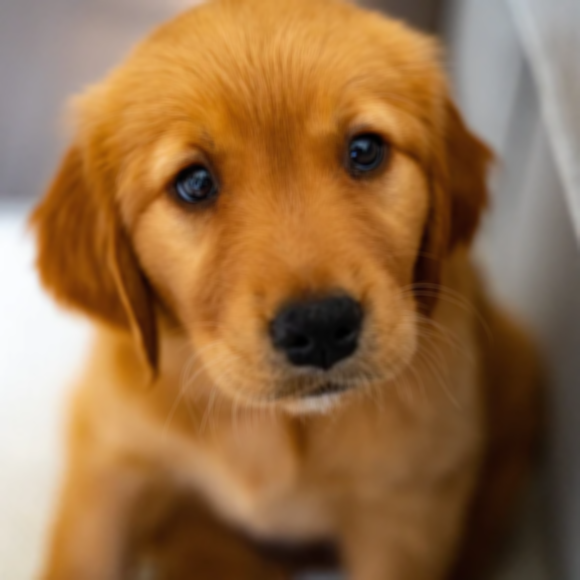

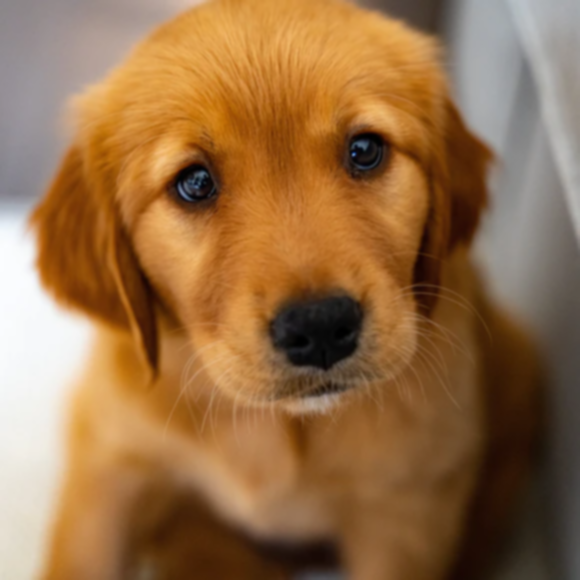

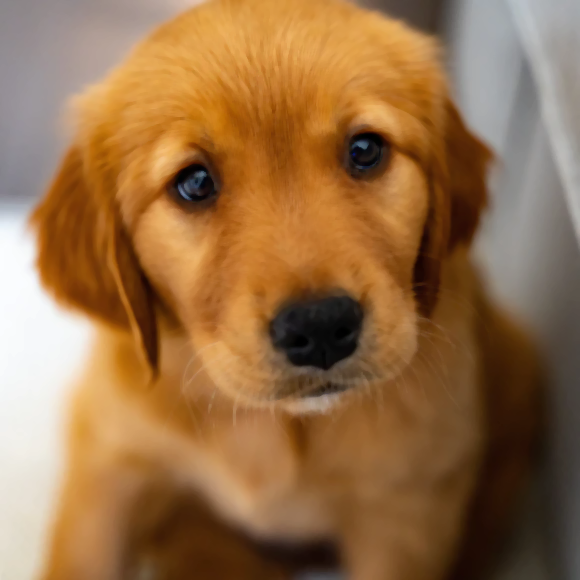

In [ ]:
## Averaging done by convolving the image with a normalized box filter
## This takes the pixels under the box and replaces the central element
## Box size needs to odd and positive

blur = cv2.blur(img, (5, 5))
cv2_imshow(blur) ## Averaging

## Instead of box filter, gaussian kernel
gaussian = cv2.GaussianBlur(img, (5, 5), 0)
cv2_imshow(gaussian), ## Gaussian

## Takes median of all the pixels under kernel area and central
## element is replaced with this median value
median = cv2.medianBlur(img, 5)
cv2_imshow(median) ## Median Blurring

In [ ]:
## Bilateral Filter
##    dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
##  	Source 8-bit or floating-point, 1-channel or 3-channel image.
##      Destination image of the same size and type as src .
##      Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
##  	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
##  	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
##  	border mode used to extrapolate pixels outside of the image

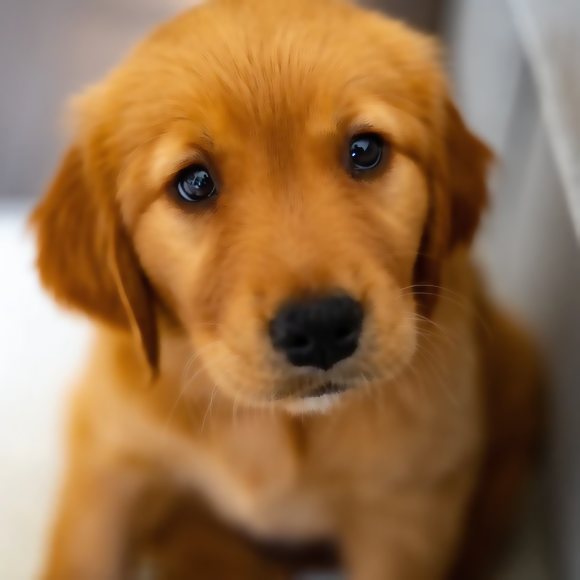

In [ ]:
## Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(img, 8, 75, 75)
cv2_imshow(bilateral) ## Bilateral Blurring

In [ ]:
## mage De-noising - Non-Local Means Denoising
##  There are 4 variations of Non-Local Means Denoising:

##   cv2.fastNlMeansDenoising() - works with a single grayscale images
##   cv2.fastNlMeansDenoisingColored() - works with a color image.
##   cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
##   cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

##  fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

##   Parameters for fastNlMeansDenoisingColored:	

##  Input 8-bit 3-channel image.
##  Output image with the same size and type as src .
##  Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
##  Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
##  Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
##  The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

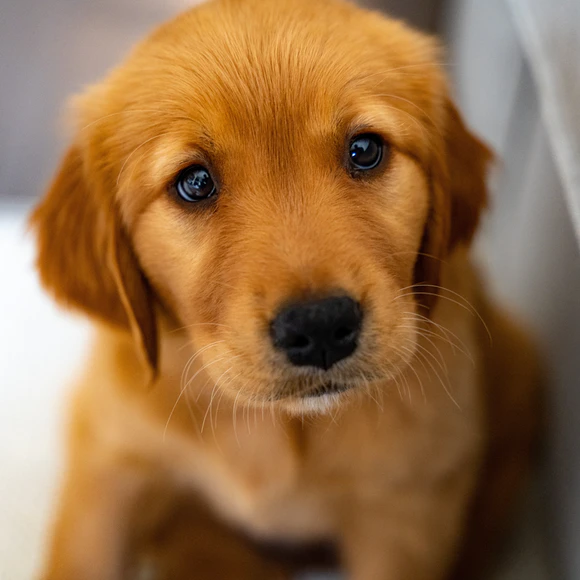

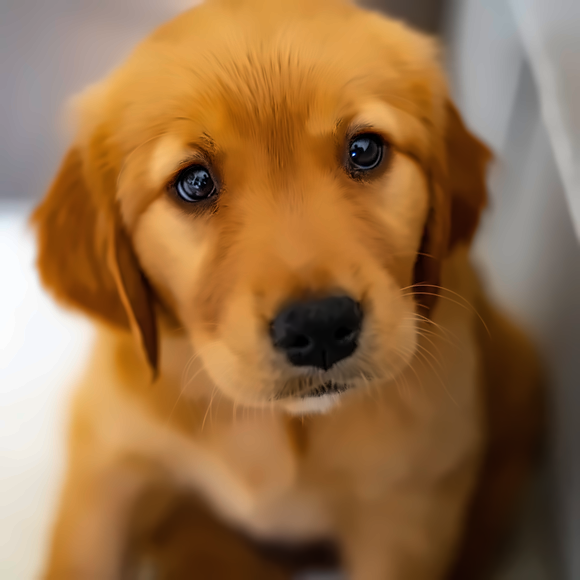

In [ ]:
cv2_imshow(img)

dst = cv2.fastNlMeansDenoisingColored(img, None, 6, 6, 7, 21)
cv2_imshow(dst) #fastN1MeansDenoisingColored

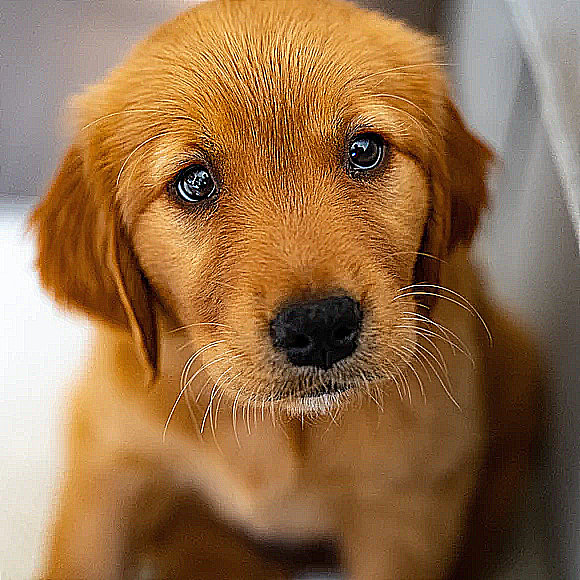

In [ ]:
## Sharpening Images

## Create our sharpening kernel, remember it must sum to one
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])


## applying the sharpening kernel to the image
shapening = cv2.filter2D(img, -1, kernel_sharpening)
cv2_imshow(shapening) ## Shapened Image